In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mae tha
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | grand gaube
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | saint-augustin
Processing Record 13 of Set 1 | rockwall
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | kresttsy
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | salala

Processing Record 38 of Set 4 | yining
Processing Record 39 of Set 4 | hanstholm
Processing Record 40 of Set 4 | sogne
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | zlobin
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | amapa
Processing Record 46 of Set 4 | zhangzhou
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | yellowknife
Processing Record 50 of Set 4 | jalna
Processing Record 1 of Set 5 | maltahohe
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | khandyga
Processing Record 4 of Set 5 | antofagasta
Processing Record 5 of Set 5 | paamiut
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | san patricio
Processing Record 8 of Set 5 | boa vista
Processing Record 9 of Set 5 | la ronge
Processing Record 10 of Set 5 | qiyang
Processing Record 11 of Set 5 | jiayuguan
Processing Record 12 of Set 5 

Processing Record 30 of Set 8 | aykhal
Processing Record 31 of Set 8 | sambava
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | belaya gora
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | galesong
Processing Record 36 of Set 8 | durres
Processing Record 37 of Set 8 | vilhena
Processing Record 38 of Set 8 | aflu
City not found. Skipping...
Processing Record 39 of Set 8 | leshukonskoye
Processing Record 40 of Set 8 | mandurah
Processing Record 41 of Set 8 | dudinka
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | dzilam gonzalez
Processing Record 44 of Set 8 | alugan
Processing Record 45 of Set 8 | comodoro rivadavia
Processing Record 46 of Set 8 | shiyan
Processing Record 47 of Set 8 | tyrma
Processing Record 48 of Set 8 | namibe
Processing Record 49 of Set 8 | carauari
Processing Record 50 of Set 8 | sorland
Processing Record 1 of Set 9 | mayor pablo lagerenza
Processing Record 2 of Set 9 | uryupinsk
Processi

Processing Record 20 of Set 12 | araouane
Processing Record 21 of Set 12 | mildura
Processing Record 22 of Set 12 | togur
Processing Record 23 of Set 12 | sao joao da barra
Processing Record 24 of Set 12 | bay roberts
Processing Record 25 of Set 12 | chik
Processing Record 26 of Set 12 | aksay
Processing Record 27 of Set 12 | ulvik
Processing Record 28 of Set 12 | ca mau
Processing Record 29 of Set 12 | north platte
Processing Record 30 of Set 12 | xiongzhou
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | nhamunda
Processing Record 33 of Set 12 | kavaratti
Processing Record 34 of Set 12 | gamba
Processing Record 35 of Set 12 | nadym
Processing Record 36 of Set 12 | inhambane
Processing Record 37 of Set 12 | grand-santi
Processing Record 38 of Set 12 | killybegs
Processing Record 39 of Set 12 | oktyabrskiy
Processing Record 40 of Set 12 | orissaare
Processing Record 41 of Set 12 | tsentralnyy
City not found. Skipping...
Processing Record 42 of Set 12 | mayo
Pr

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mae Tha,18.4646,99.1403,79.79,46,7,1.07,TH,2022-04-21 17:35:20
1,Victoria,22.2855,114.1577,76.32,84,68,8.99,HK,2022-04-21 17:30:28
2,Vaini,-21.2000,-175.2000,75.36,100,75,0.00,TO,2022-04-21 17:35:20
3,Butaritari,3.0707,172.7902,80.92,82,93,13.91,KI,2022-04-21 17:35:21
4,Rikitea,-23.1203,-134.9692,73.02,90,99,15.95,PF,2022-04-21 17:35:21
5,Grand Gaube,-20.0064,57.6608,79.20,81,74,5.99,MU,2022-04-21 17:35:22
6,Mataura,-46.1927,168.8643,46.47,99,100,7.16,NZ,2022-04-21 17:35:22
7,Busselton,-33.6500,115.3333,57.56,66,0,13.94,AU,2022-04-21 17:35:22
8,Severo-Kurilsk,50.6789,156.1250,35.44,93,80,11.30,RU,2022-04-21 17:35:23
9,Port Hardy,50.6996,-127.4199,46.58,81,75,6.91,CA,2022-04-21 17:35:23


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mae Tha,TH,2022-04-21 17:35:20,18.4646,99.1403,79.79,46,7,1.07
1,Victoria,HK,2022-04-21 17:30:28,22.2855,114.1577,76.32,84,68,8.99
2,Vaini,TO,2022-04-21 17:35:20,-21.2000,-175.2000,75.36,100,75,0.00
3,Butaritari,KI,2022-04-21 17:35:21,3.0707,172.7902,80.92,82,93,13.91
4,Rikitea,PF,2022-04-21 17:35:21,-23.1203,-134.9692,73.02,90,99,15.95
5,Grand Gaube,MU,2022-04-21 17:35:22,-20.0064,57.6608,79.20,81,74,5.99
6,Mataura,NZ,2022-04-21 17:35:22,-46.1927,168.8643,46.47,99,100,7.16
7,Busselton,AU,2022-04-21 17:35:22,-33.6500,115.3333,57.56,66,0,13.94
8,Severo-Kurilsk,RU,2022-04-21 17:35:23,50.6789,156.1250,35.44,93,80,11.30
9,Port Hardy,CA,2022-04-21 17:35:23,50.6996,-127.4199,46.58,81,75,6.91


In [12]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

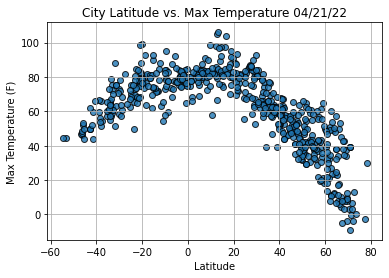

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

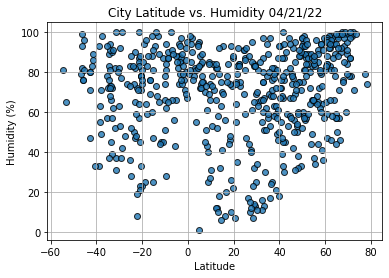

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

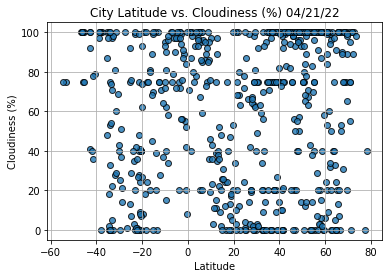

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

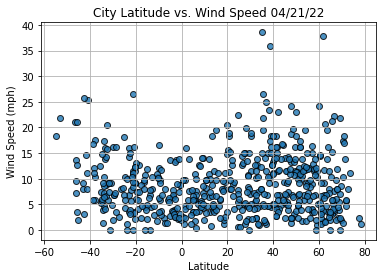

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()